In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [23]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


### **1** 
Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

In [24]:
ARG_wine_reviews = wine_reviews[wine_reviews['country']=='Argentina']
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

CHI_wine_reviews = wine_reviews[wine_reviews['country']=='Chile']
# Tomamos como coordenadas en x los precios
precio_chi = CHI_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_chi = CHI_wine_reviews.points.values

ESP_wine_reviews = wine_reviews[wine_reviews['country']=='Spain']
# Tomamos como coordenadas en x los precios
precio_esp = ESP_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_esp = ESP_wine_reviews.points.values

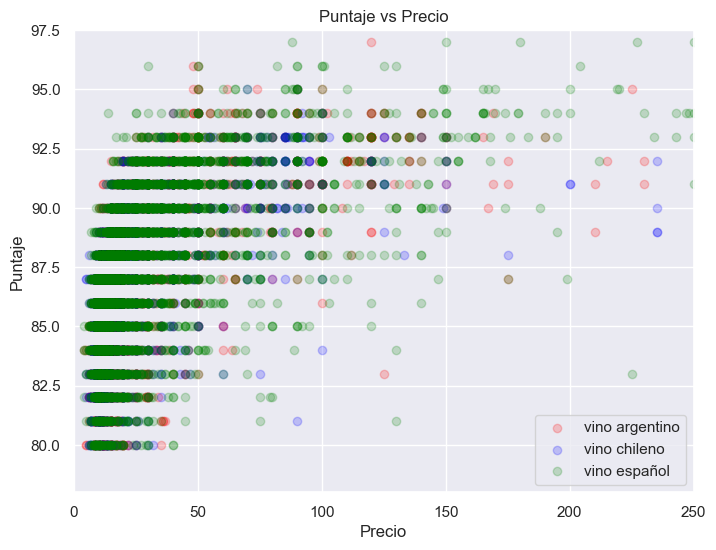

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(precio_arg, puntos_arg, color='red', label='vino argentino', alpha=0.2)
ax.scatter(precio_chi, puntos_chi, color='blue', label='vino chileno', alpha=0.2)
ax.scatter(precio_esp, puntos_esp, color='green', label='vino español', alpha=0.2)
ax.set_xlabel('Precio')
ax.set_ylabel('Puntaje')
ax.set_title('Puntaje vs Precio')
ax.legend(loc='best')
ax.set_xlim(0, 250)
ax.set_ylim(78, 97.5)
plt.show()

Para realizar este mismo gráfico con seaborn, solo precisamos una linea de código: 

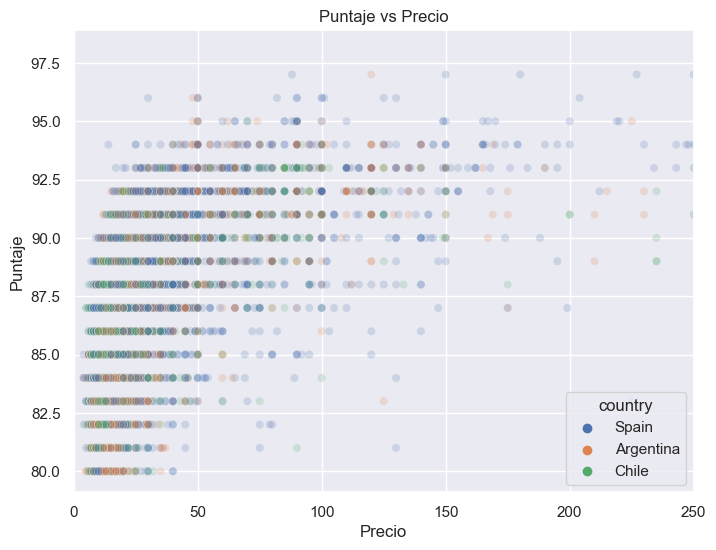

In [26]:
#grafico scatter con seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='price', y='points', hue='country', 
                data=wine_reviews[wine_reviews['country'].isin(['Argentina','Chile','Spain'])], alpha=0.2,ax=ax) # ax=ax para que se grafique en el mismo gráfico
ax.set_xlabel('Precio')
ax.set_ylabel('Puntaje')
ax.set_title('Puntaje vs Precio')
ax.set_xlim(0, 250)
plt.show()

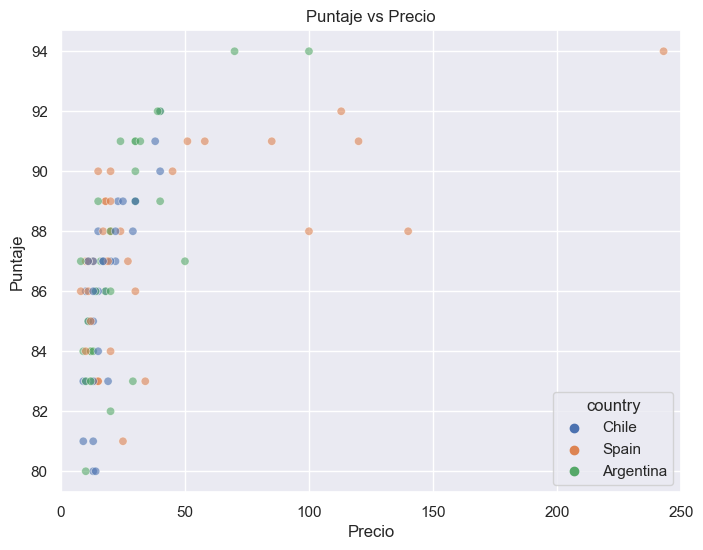

In [65]:
# Grafico de dispersión con seaborn con 100 muestras aleatorias
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='price', y='points', hue='country', 
                data=wine_reviews[wine_reviews['country'].isin(['Argentina','Chile','Spain'])].sample(100), alpha=0.6,ax=ax) # ax=ax para que se grafique en el mismo gráfico, sample(1000) para seleccionar 100 muestras aleatorias
ax.set_xlabel('Precio')
ax.set_ylabel('Puntaje')
ax.set_title('Puntaje vs Precio')
ax.set_xlim(0, 250)
plt.show()


En este caso, le estamos indicando a la funcion `scatterplot` que no solo queremos que tome la columna `price` como eje `x` y la columna `points` como eje `y`, sino que además queremos que indique con colores distintos los puntos segun su valor de la columna `country`. Esto lo hacemos mediante el argumento `hue` (`hue="country"`).

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar algunas de las funciones de visualización que nos ofrece esta libreria.

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

### **2**

1. Realizar con Seaborn un gráfico del ancho del petalo según la especie
2. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind`
3. ¿Que representan las barritas negras?
4. Averiguar la utilidad de los parámetros `ci` y `estimator`.

In [27]:
iris_data=sns.load_dataset('iris') # Cargamos el dataset 
iris_data.head()# Mostramos las primeras 5 filas del dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


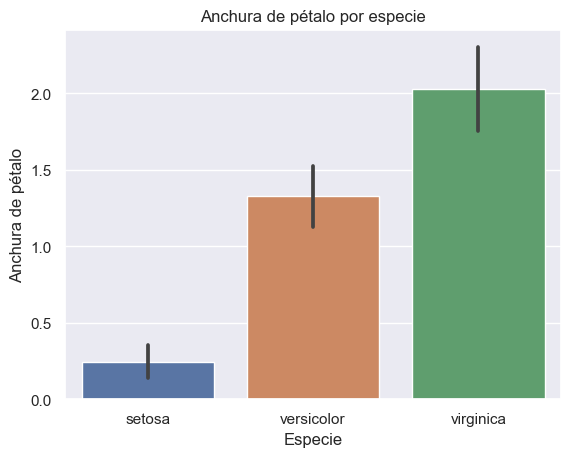

In [47]:
sns.barplot(data = iris_data, x = "species", y = "petal_width", errorbar='sd', estimator=np.mean) # Graficamos el promedio de la anchura del pétalo por especie,
                                                                                              # ci = "sd" para que se grafique la desviación estándar, esta deprecado
                                                                                              # errorbar='sd' para que se grafique la desviación estándar
                                                                                              # estimator=np.mean para que se grafique el promedio y no la mediana 
plt.xlabel("Especie") # Etiqueta eje x
plt.ylabel("Anchura de pétalo") # Etiqueta eje y
plt.title("Anchura de pétalo por especie") # Título del gráfico

plt.show()  # Mostramos el gráfico

# la gráfica permite observar que la especie setosa tiene el menor promedio de anchura de pétalo, 
# mientras que la especie virginica tiene el mayor promedio de anchura de pétalo
# la especie versicolor tiene un promedio de anchura de pétalo intermedio entre las otras dos especies
# la especie setosa tiene la menor desviación estándar, mientras que la especie virginica tiene la mayor desviación estándar


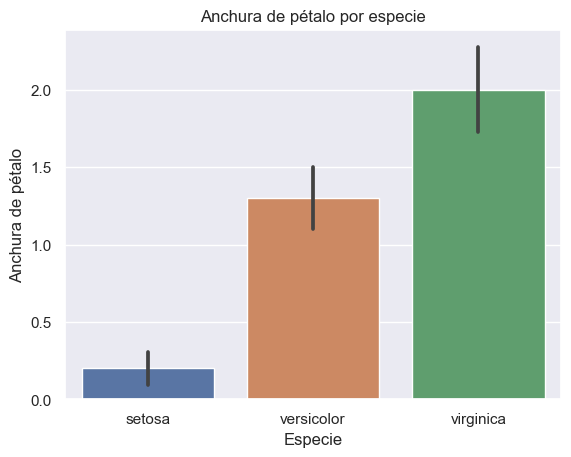

In [48]:
sns.barplot(data = iris_data, x = "species", y = "petal_width", errorbar='sd', estimator=np.median) # Graficamos la mediana de la anchura del pétalo por especie,
                                                                                                # ci = "sd" para que se grafique la desviación estándar, esta deprecado
                                                                                                # errorbar='sd' para que se grafique la desviación estándar
                                                                                                # estimator=np.median para que se grafique la mediana y no el promedio
plt.xlabel("Especie") # Etiqueta eje x
plt.ylabel("Anchura de pétalo") # Etiqueta eje y
plt.title("Anchura de pétalo por especie") # Título del gráfico


plt.show()  # Mostramos el gráfico

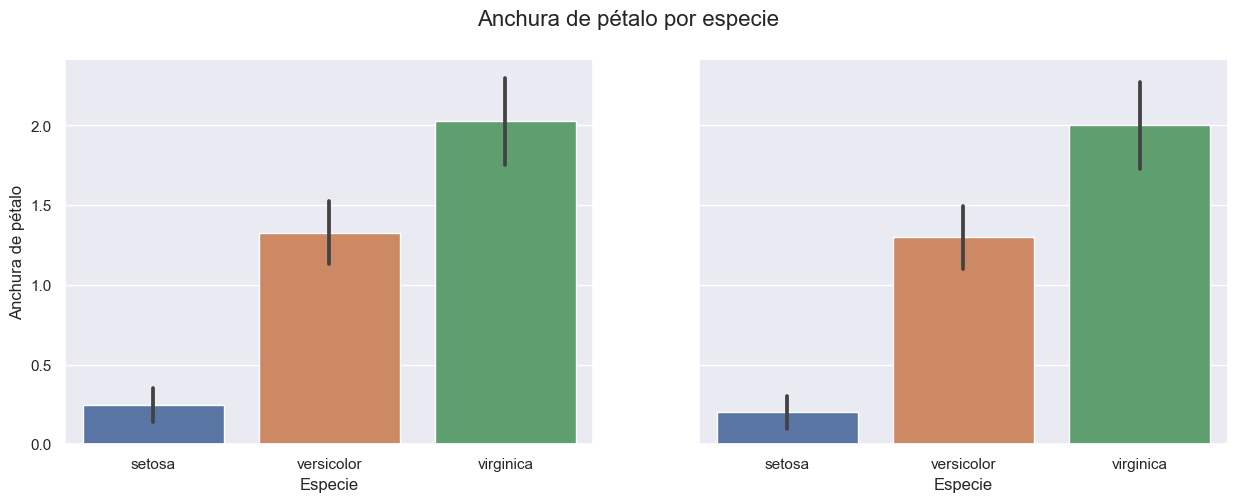

In [55]:
#combinar las anteriores gráficas

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharey=True) # Creamos una figura con dos gráficos
# Poner titulo para toda la figura
fig.suptitle("Anchura de pétalo por especie", fontsize=16)

sns.barplot(data = iris_data, x = "species", y = "petal_width", errorbar='sd', estimator=np.mean, ax=ax1) 
ax1.set_xlabel("Especie") # Etiqueta eje x
ax1.set_ylabel("Anchura de pétalo") # Etiqueta eje y

sns.barplot(data = iris_data, x = "species", y = "petal_width", errorbar='sd', estimator=np.median, ax=ax2)                                      
ax2.set_xlabel("Especie") # Etiqueta eje x
ax2.set_ylabel("") #ignorar la etiqueta del eje y

plt.show()  # Mostramos el gráfico


### **3**

1. En el último gráfico, era difícil visualizar bien los resultados debido a precios que eran mucho más grandes que los demás. ¿Cómo podría solucionar facilmente este problema? 
2. Averigüe cómo cambiar el gráfico si desea que los 3 ejes aparezcan apilados verticalmente en lugar de uno al lado del otro.
3. Averigüe cómo hacer un violin plot y conjeture en qué circunstancias podría ser de utilidad.

In [30]:
wine_reviews_filtro_pais = wine_reviews[wine_reviews['country'].isin(['Argentina','Chile','Spain'])]

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


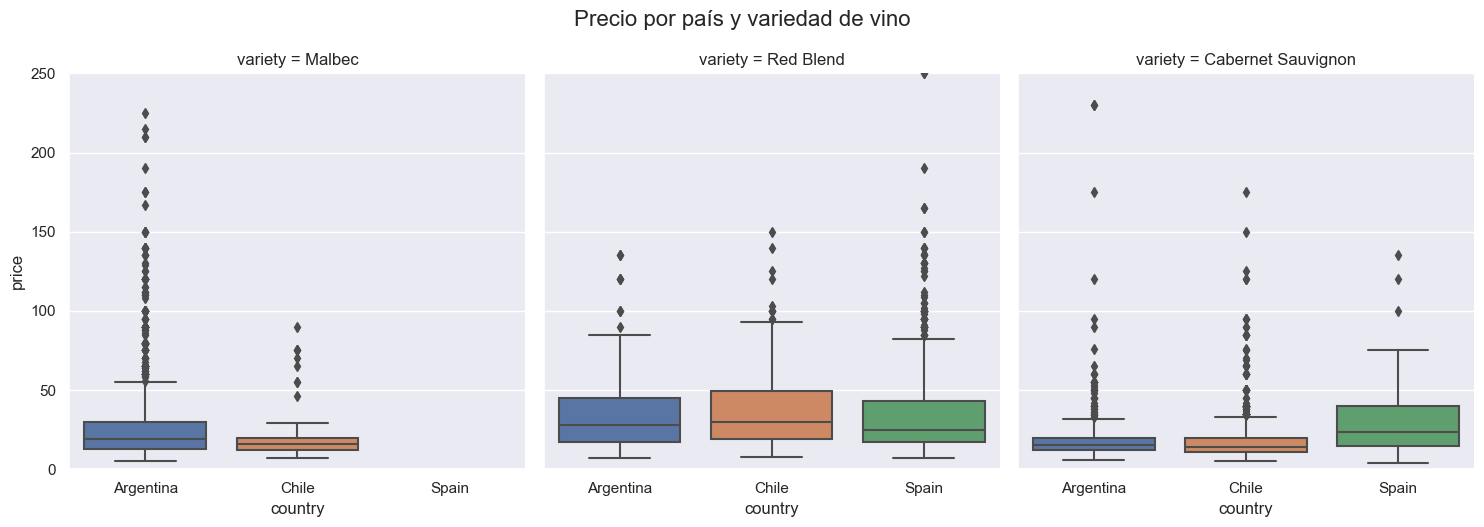

In [72]:
sns.catplot(x="country", y="price", col="variety", kind='box',  # Graficamos el precio por país y variedad de vino en un boxplot
                                                                # kind='box' para que se grafique un boxplot, col="variety" para que se grafique un boxplot por variedad de vino
            data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])]) # Filtramos por país y variedad de vino
plt.ylim(0, 250) # Limitamos el eje y entre 0 y 100
# poner titulo a toda la figura que no se traslape con las otras letras
plt.suptitle("Precio por país y variedad de vino", fontsize=16, y=1.05) # y=1.05 para que el titulo no se traslape con las otras letras

plt.show() # Mostramos el gráfico

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


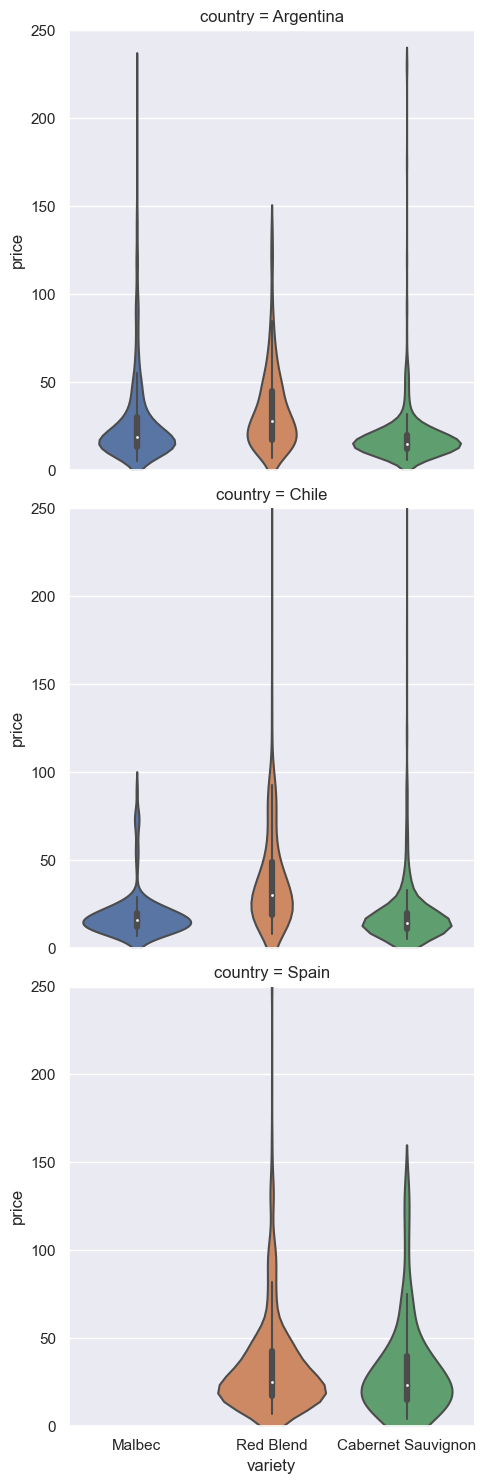

In [74]:
sns.catplot(x="variety", y="price", row="country", kind='violin',  # Graficamos el precio por país y variedad de vino en un violinplot,
                                                                   # row="country" para que se grafique por país en filas
                                                                   # kind='violin' para que se grafique un violinplot                                                                   
            data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])]) # Filtramos por país y variedad de vino
plt.ylim(0,250) # Limitamos el eje y entre 0 y 100
plt.show()

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


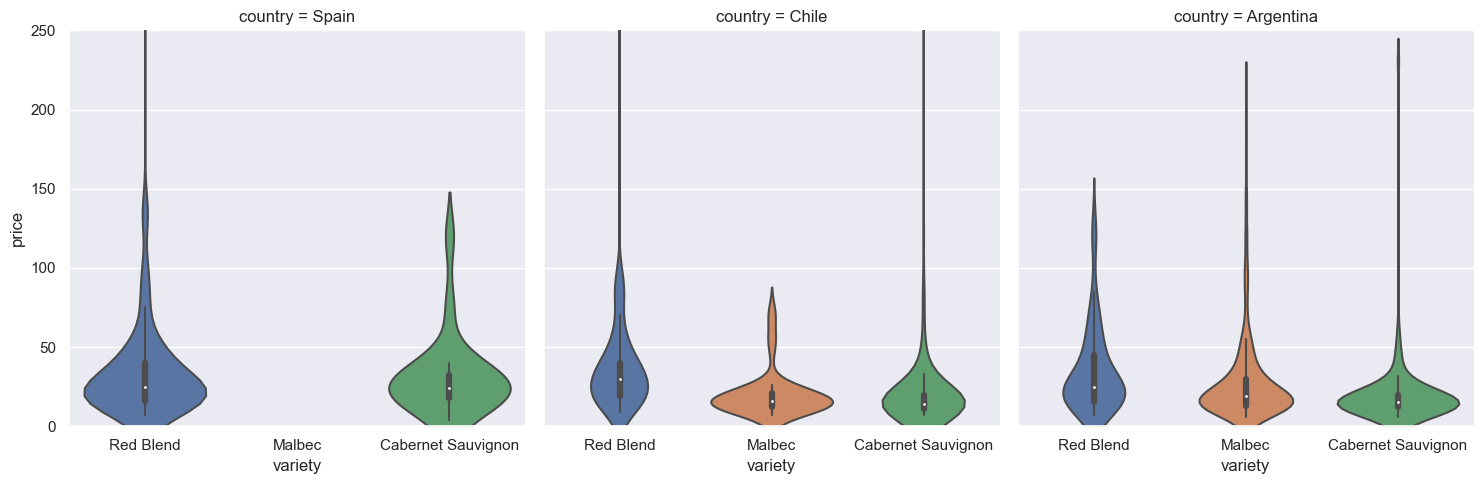

In [92]:
#graficar la anterio grafica pero todas en el eje x

sns.catplot(x="variety", y="price", col="country", kind='violin',  # Graficamos el precio por país y variedad de vino en un violinplot,
                                                                     # col="country" para que se grafique por país en columnas
                                                                     # kind='violin' para que se grafique un violinplot                                                                   
                data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])].sample(2000)) # Filtramos por país y variedad de vino y tomamos 2000 muestras aleatorias                                         
plt.ylim(0,250) # Limitamos el eje y entre 0 y 100
plt.show()

### **4**

1. Genere un nuevo dataset a partir del dataset de vinos original (wine_reviews) que contenga sólo los vinos cuya variedad es Pinot Noir.
2. Descarte de este dataset las instancias que contengan un `NaN` en alguno de sus campos.
3. Descarte del dataset los vinos con un precio mayor a 200. Para esto pueden generarse una máscara.
4. Graficar en Seaborn un `distplot` con los precios de vinos que contenga el histograma, el KDE y el rugplot.

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


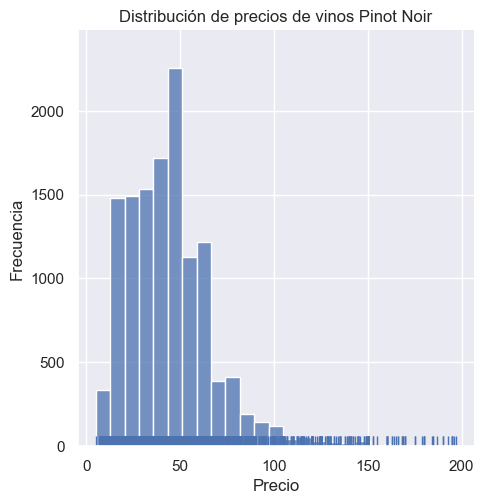

In [76]:
vinos_pinot = wine_reviews[wine_reviews['variety'] == 'Pinot Noir'].dropna() # Filtramos por variedad de vino Pinot Noir y eliminamos los valores nulos
vinos_pinot = vinos_pinot[vinos_pinot['price'] < 200] # Filtramos por precio menor a 200
sns.displot(vinos_pinot['price'], bins=25) # Graficamos la distribución de los precios de los vinos Pinot Noir
sns.rugplot(vinos_pinot['price']) # Graficamos los precios de los vinos Pinot Noir en el eje x
plt.xlabel('Precio') # Etiqueta eje x
plt.ylabel('Frecuencia') # Etiqueta eje y
plt.title('Distribución de precios de vinos Pinot Noir') # Título del gráfico
plt.show() # Mostramos el gráfico # distplot esta deprecado y se recomienda usar displot

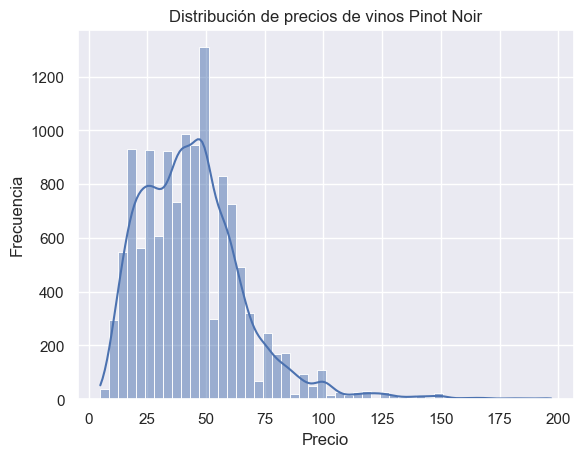

In [77]:
sns.histplot(vinos_pinot['price'], bins=50,kde=True) # Graficamos la distribución de los precios de los vinos Pinot Noir con más bins
plt.xlabel('Precio') # Etiqueta eje x
plt.ylabel('Frecuencia') # Etiqueta eje y
plt.title('Distribución de precios de vinos Pinot Noir') # Título del gráfico
plt.show() # Mostramos el gráfico

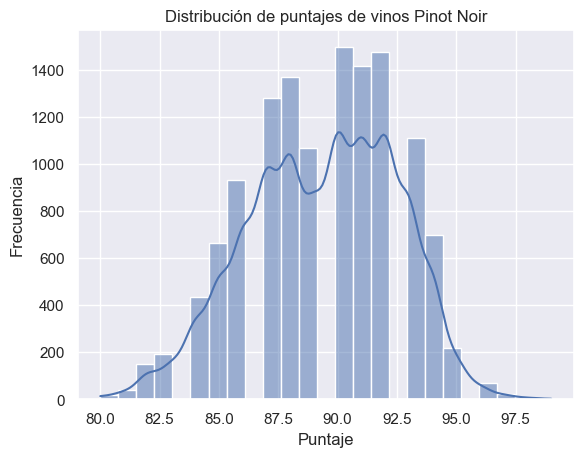

In [78]:
sns.histplot(vinos_pinot['points'], bins=25, kde = True) # Graficamos la distribución de los puntajes de los vinos Pinot Noir  
plt.xlabel('Puntaje') # Etiqueta eje x
plt.ylabel('Frecuencia') # Etiqueta eje y
plt.title('Distribución de puntajes de vinos Pinot Noir') # Título del gráfico 
plt.show() # Mostramos el gráfico

# kde = True para que se grafique la estimación de densidad de kernel, 
#la densidad de kernel es una forma no paramétrica de estimar la función de densidad de probabilidad de una variable aleatoria continua.

### **5**

1. Graficar un `pairplot` para el dataset de vinos reducido (3 paises y 3 variedades). Antes de hacerlo, ¿cuantas filas y cuantas columans espera que tenga este gráfico?
2. Graficar el mismo `pairplot`, pero esta vez distinga los datos según variedad.
3. Idem al punto anterior, pero distinga según país.

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


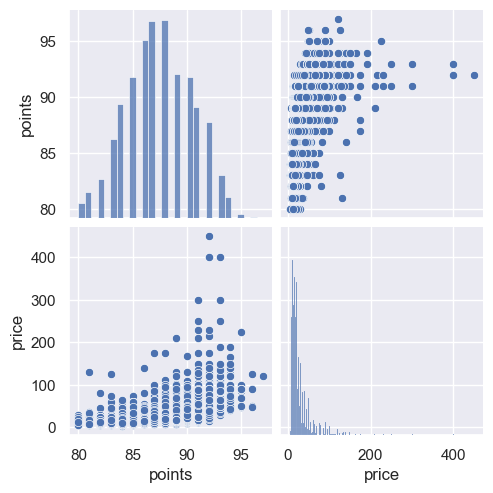

In [87]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])])
plt.show() # Mostramos el gráfico

# Graficamos la matriz de correlación de las variables numéricas del dataset

In [37]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])], hue="variety") # hue="variety" para que se grafique por variedad de vino
plt.show() # Mostramos el gráfico
# Graficamos la matriz de correlación de las variables numéricas del dataset por variedad de vino

![Alt text](image-4.png)

In [38]:
sns.pairplot(data=wine_reviews_filtro_pais[wine_reviews_filtro_pais['variety'].isin(['Malbec','Red Blend','Cabernet Sauvignon'])], hue="country")

# Graficamos la matriz de correlación de las variables numéricas del dataset por país

![Alt text](image-3.png)